# **Installing and Importing packages**

In [1]:
!pip install scikit-plot
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import time
import warnings
import io
import copy as cp
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor
from google.colab import files
from typing import Tuple

## **Importing and Inspecting the Dataset**

In [3]:
#Uploading dataset from local drive
uploaded = files.upload()

Saving Dataset_BankChurners.csv to Dataset_BankChurners.csv


In [4]:
#Reading the Dataset
df = pd.read_csv(io.BytesIO(uploaded['Dataset_BankChurners.csv']))

#Inspecting the Dataset
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.shape

(10127, 20)

In [6]:
print(df.groupby(['Attrition_Flag']).Attrition_Flag.count())

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: Attrition_Flag, dtype: int64


# **Data PreProcessing**

In [7]:
#Coding attrited customers as 1, and existing customers as 0
df.Attrition_Flag = df.Attrition_Flag.replace({'Existing Customer':0, 'Attrited Customer':1})

Following attributes are Categorical Variables: Gender, Education Level, Marital Status, Income Category and Card Category. Each have various levels. Categorical varaibles need to be converted in a form that ML algorithms can do a better job in prediction.

One-Hot Encoding creates new variables for each level of an existing categorical variable, and assigns a binary value of 0 or 1 for that observation. Example: For the Gender attribute with 2 category levels of “F” and “M”, One-Hot Encoding will produce 2 variables: Gender.F and Gender.M. For a male customer, the value for Gender.F variable will be 0, and Gender.M will be 1.

In [8]:
#One-Hot Encoding
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
df_new.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Plat

In [9]:
#Shape of the new dataset after One-Hot Encoding
df_new.shape

(10127, 38)

In [10]:
#Inspecting the Dataset
df_new.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0


## Train/Test split
Splitting the dataset in training and testing set in 70:30 ratio

In [11]:
#Make independent/dependent variables
X = df_new.drop(['Attrition_Flag'],axis=1)
y = df_new['Attrition_Flag']

#Train/test data in ration 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

print(f"Length of test data after 70:30 split: {len(y_test)}\n")
print(f"Length of training data after 70:30 split: {len(y_train)}")
print(f"\tCount of attrited customers in training data : {sum(y_train==1)}")
print(f"\tCount of existing customers in training data: {sum(y_train==0)} \n")

Length of test data after 70:30 split: 3039

Length of training data after 70:30 split: 7088
	Count of attrited customers in training data : 1112
	Count of existing customers in training data: 5976 



# **Modelling**

## **Logistic Regression model**
Logistic Regression is a popoular algorithm for binary classification problems, although Logistic Regression can be used for multinomial classification as well.

We will be evaluating the execution time as well.

In [12]:
#Mark the Start time
start = time.time()

#Building and training the Logistic Regression  model
LogReg_Model = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 9999)
LogReg_Model.fit(X_train, y_train.values.ravel())

#Note the end time
end = time.time()

print("The time (in seconds) for generating the Logistic Regression model is:", end-start)

The time (in seconds) for generating the Logistic Regression model is: 0.25770139694213867


### Logistic Regression - Predicting the dependent attribute of the test set

In [13]:
Y_Pred_LogReg = LogReg_Model.predict(X_test)

### Logistic Regression - Generating the Confusion Matrix

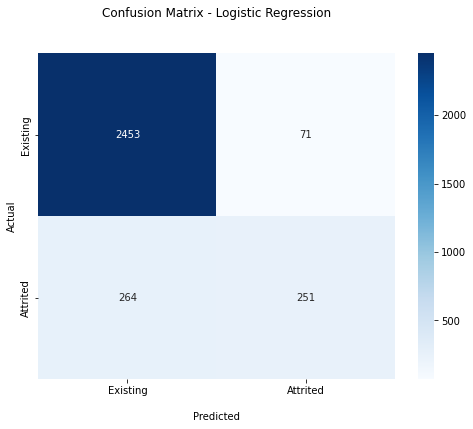

In [14]:
Conf_Mat_Log_Reg = confusion_matrix(y_test, Y_Pred_LogReg)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(Conf_Mat_Log_Reg, annot=True, fmt='d', cmap='Blues')
ax.set_title("Confusion Matrix - Logistic Regression\n\n");
ax.set_xlabel("\nPredicted")
ax.set_ylabel("Actual");

ax.xaxis.set_ticklabels(["Existing","Attrited"])
ax.yaxis.set_ticklabels(["Existing","Attrited"])

## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic Regression - Evaluation Metrics

In [15]:
def print_scores(y_test, y_pred):
  #Function to print the evaluation metrics
    print("The Accuracy is:", round(metrics.accuracy_score(y_test, y_pred),2))    #Accuracy Score: TP + TN / TP + TN + FP + FN
    print("The Recall Score is:", round(metrics.recall_score(y_test, y_pred),2))    #Recall Score:  TP/ TP + FN    
    print("The Precision Score is:", round(metrics.precision_score(y_test, y_pred),2))    #Precision Score:  TP/ TP + FP
    print("The F1 Score is:", round(metrics.f1_score(y_test, y_pred),2)) #F1 Score/ A combination of Recall Score and Precision Score
print_scores(y_test, Y_Pred_LogReg)

The Accuracy is: 0.89
The Recall Score is: 0.49
The Precision Score is: 0.78
The F1 Score is: 0.6


### k-fold Cross-Validation
Since, we will be comparing different ML algorithms, it is better to use k-fold Cross-Validation to evaluate the model performance.
Cross-Validation is a resampling procedure on a limited data sample. It is used in machine learning to estimate the skill of a machine learning model in making predictions on data not used during the training of the model.

'k' refers to the number of groups that a given data sample is to be split into.



### Logistic Regression with 10-fold Cross-Validation
The average scores of Recall, Accuracy, Precision, F1 and ROC will be used to evaluate the different ML models

In [16]:
# Logistic Regression model using 10-fold Cross-Validation

# preparing the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# creating the model
model_one = LogisticRegression()
# evaluating the model
recall_scores_LogReg = cross_val_score(model_one, X, y, scoring='recall', cv=cv, n_jobs=-1)
accuracy_scores_LogReg = cross_val_score(model_one, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
precision_scores_LogReg = cross_val_score(model_one, X, y, scoring='precision', cv=cv, n_jobs=-1)
f1_scores_LogReg = cross_val_score(model_one, X, y, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores_LogReg = cross_val_score(model_one, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# reporting the performance
print('Logistic Regression - Average Recall: %.2f ' % (mean(recall_scores_LogReg)))
print('Logistic Regression - Average Accuracy: %.2f ' % (mean(accuracy_scores_LogReg)))
print('Logistic Regression - Average Precision: %.2f ' % (mean(precision_scores_LogReg)))
print('Logistic Regression - Average F1: %.2f ' % (mean(f1_scores_LogReg)))
print('Logistic Regression - Average ROC AUC: %.2f ' % (mean(roc_auc_scores_LogReg)))

Logistic Regression - Average Recall: 0.42 
Logistic Regression - Average Accuracy: 0.87 
Logistic Regression - Average Precision: 0.68 
Logistic Regression - Average F1: 0.52 
Logistic Regression - Average ROC AUC: 0.88 


## **Balancing the dataset with SMOTE**
The dataset is imbalanced with only 1627 'Attritited' customers out of 10127 total customers, representing 16% churn. With this imbalance, the learning models may create bias in prediction. Hence we are oversampling the minotority class "Attrited" customers to create 50% attrited and 50% existing customers.
We will be using SMOTE for over-sampling technique.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.


### Train/test split and Generating oversampled training data to balance the classes 50:50

In [17]:
#We have already made independent/dependent variables
#X = df_new.drop(['Attrition_Flag'],axis=1)
#y = df_new['Attrition_Flag']

Only the train dataset will be oversampled using SMOTE. Test set will be untouched.

In [18]:
#Make train/test data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X, y, test_size = 0.3,
                                                                            random_state = 11)
#Defining SMOTE
sampler = SMOTE(k_neighbors = 5, random_state = 11)

#Oversampling the train dataset using SMOTE. Test set will be untouched
X_sampler, y_sampler = sampler.fit_resample(X_train_smote, y_train_smote)

print("Length of test set, before as well as after SMOTE oversampling, is:", len(X_test_smote))

print("\nLength of train set, before SMOTE oversampling, is:", len(X_train_smote))
print("Length of train set, after SMOTE oversampling, is:", len(X_sampler))

print("\tCount of Attrited customers in oversampled data:",len(y_sampler[y_sampler==1]))
print("\tCount of Existing customers in oversampled data:",len(y_sampler[y_sampler==0]))

print("\tProportion of Attrited customers in oversampled data is:",len(y_sampler[y_sampler==1])/len(X_sampler))
print("\tProportion of Existing customers in oversampled data is:",len(y_sampler[y_sampler==0])/len(X_sampler))

Length of test set, before as well as after SMOTE oversampling, is: 3039

Length of train set, before SMOTE oversampling, is: 7088
Length of train set, after SMOTE oversampling, is: 11952
	Count of Attrited customers in oversampled data: 5976
	Count of Existing customers in oversampled data: 5976
	Proportion of Attrited customers in oversampled data is: 0.5
	Proportion of Existing customers in oversampled data is: 0.5


Predictive Analysis via Logistic Regression will be done on the balanced dataset.

## **Logistic Regression model after SMOTE**

We will be evaluating the execution time as well.

In [19]:
#Mark the Start time
start = time.time()

#Building and training the Logistic Regression  model after SMOTE
Reg_Model = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 9999)
Reg_Model.fit(X_sampler, y_sampler.values.ravel())

#Note the end time
end = time.time()

print("The time (in seconds) for generating the Logistic Regression model is:", end-start)

The time (in seconds) for generating the Logistic Regression model is: 10.677715301513672


### Logistic Regression after SMOTE - Predicting the dependent attribute of the test set

In [20]:
Y_Pred = Reg_Model.predict(X_test_smote)

### Logistic Regression after SMOTE - Generating the Confusion Matrix

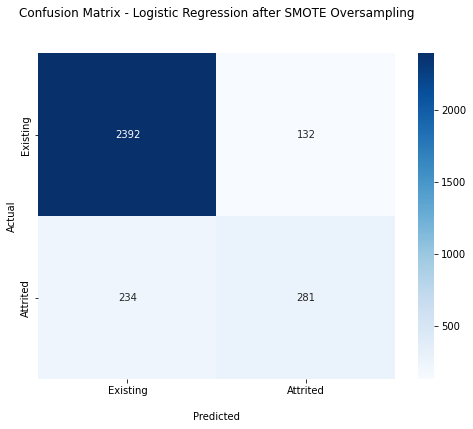

In [21]:
Conf_Mat_Log_Reg = confusion_matrix(y_test_smote, Y_Pred)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(Conf_Mat_Log_Reg, annot=True, fmt='d', cmap='Blues')
ax.set_title("Confusion Matrix - Logistic Regression after SMOTE Oversampling\n\n");
ax.set_xlabel("\nPredicted")
ax.set_ylabel("Actual");

ax.xaxis.set_ticklabels(["Existing","Attrited"])
ax.yaxis.set_ticklabels(["Existing","Attrited"])

## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic Regression after SMOTE - Evaluation Metrics

In [22]:
def print_scores(y_test, y_pred):
  #Function to print the evaluation metrics
    print("The Accuracy is:", round(metrics.accuracy_score(y_test, y_pred),2))    #Accuracy Score: TP + TN / TP + TN + FP + FN
    print("The Recall Score is:", round(metrics.recall_score(y_test, y_pred),2))    #Recall Score:  TP/ TP + FN    
    print("The Precision Score is:", round(metrics.precision_score(y_test, y_pred),2))    #Precision Score:  TP/ TP + FP
    print("The F1 Score is:", round(metrics.f1_score(y_test, y_pred),2)) #F1 Score/ A combination of Recall Score and Precision Score
print_scores(y_test_smote, Y_Pred)

The Accuracy is: 0.88
The Recall Score is: 0.55
The Precision Score is: 0.68
The F1 Score is: 0.61


### Logistic Regression with 10-fold Cross-Validation - after SMOTE on training data
The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only, then evaluate the model on the stratified but non-transformed test set.
This can be achieved by defining a Pipeline that first transforms the training dataset with SMOTE then fits the model.

The average scores of Recall, Accuracy, Precision, F1 and ROC will be used to evaluate the different ML models

In [24]:
#Logistic Regression model using 10-fold Cross-Validation, 
#evaluated on imbalanced dataset with SMOTE oversampling

# defining pipeline
steps = [('over', SMOTE(k_neighbors = 5, random_state = 11)), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

# evaluating pipeline
cv = KFold(n_splits=10, random_state=1, shuffle=True)

accuracy_scores_LogReg_Smote = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
recall_scores_LogReg_Smote = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
precision_scores_LogReg_Smote = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1)
f1_scores_LogReg_Smote = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
roc_auc_scores_LogReg_Smote = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# reporting performance
print('Logistic Regression after SMOTE - Average Recall: %.2f ' % (mean(recall_scores_LogReg_Smote)))
print('Logistic Regression after SMOTE - Average Accuracy: %.2f ' % (mean(accuracy_scores_LogReg_Smote)))
print('Logistic Regression after SMOTE - Average Precision: %.2f ' % (mean(precision_scores_LogReg_Smote)))
print('Logistic Regression after SMOTE - Average F1: %.2f ' % (mean(f1_scores_LogReg_Smote)))
print('Logistic Regression after SMOTE - Average ROC AUC: %.2f ' % (mean(roc_auc_scores_LogReg_Smote)))

Logistic Regression after SMOTE - Average Recall: 0.78 
Logistic Regression after SMOTE - Average Accuracy: 0.81 
Logistic Regression after SMOTE - Average Precision: 0.45 
Logistic Regression after SMOTE - Average F1: 0.57 
Logistic Regression after SMOTE - Average ROC AUC: 0.88 


Recall has improved considerably from 42% to 78% after oversampling with SMOTE